### Chegou a hora de Visualizar Dados

Vamos verificar algumas formas de visualizar dados, plotagem, etc


In [6]:
import pandas as pd
from pandas_datareader import data
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
#Vamos criar nossa primeira plotagem de dados a partir de dados do Yahoo Finance
#Vamos importar os preços das ações da Blackberry

blackberry = data.DataReader(name = 'BB', data_source = 'yahoo', start = '01/01/2007', end = '30/06/2022')
blackberry.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999
2007-01-05,47.306667,45.166668,45.500000,47.099998,41453400.0,47.099998
2007-01-08,48.410000,46.606667,47.283333,47.386665,38547300.0,47.386665
2007-01-09,47.666668,43.263332,47.570000,43.666668,74142000.0,43.666668


<AxesSubplot:xlabel='Date'>

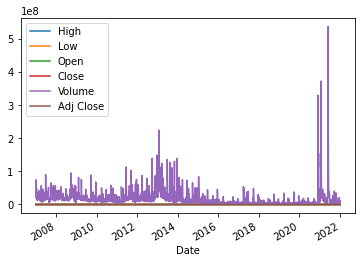

In [20]:
#A plotagem é simples:

blackberry.plot()

<AxesSubplot:xlabel='Date'>

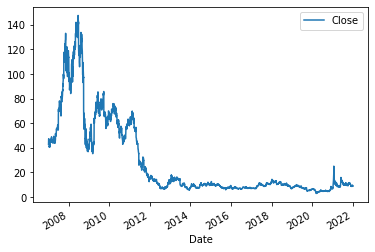

In [23]:
#Como podemos ver na legenda, as linhas em roxo representam o volume transacionado
#Porém os dados mais relevantes são de preços de abertura e fechamento
#O problema de usar o comando "plot" sem selecionar os parâmetros

#Vamos plotar novamente, mas informando quais valores desejo visualizar

blackberry.plot(y = 'Close')


<AxesSubplot:xlabel='Date'>

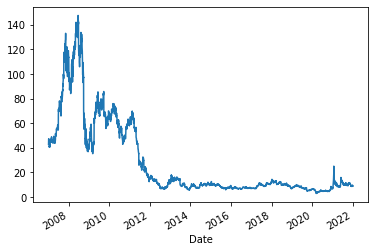

In [25]:
#Outra forma de plotar apenas os preços de fechamento é:

blackberry['Close'].plot()

#O output é igual ao gráfico acima

<AxesSubplot:xlabel='Date'>

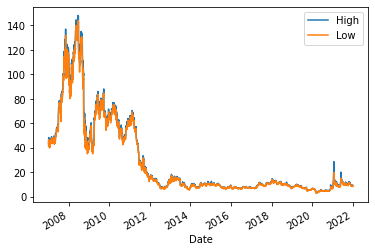

In [34]:
#Plotar duas colunas também é simples:

blackberry[['High', 'Low']].plot()

Vamos customizar nossa plotagem

In [58]:
#Vamos usar um tema de plotagem do pacote pyplot
#Primeiro vamos verificar os temas disponíveis

plt.style.available

#Agora vou aplicar o tema às plotagens

plt.style.use('ggplot')

#Não há output, porém ao plotar um gráfico notamos a diferença

<AxesSubplot:xlabel='Date'>

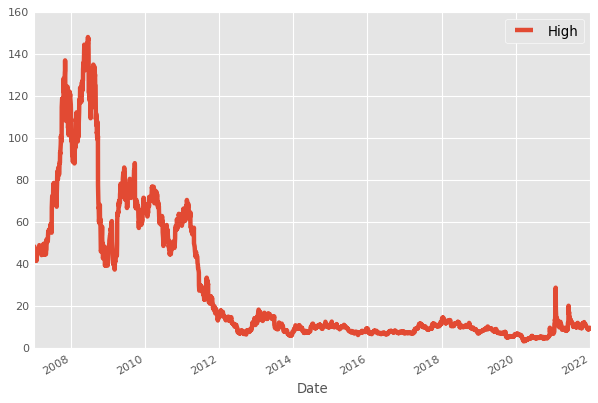

In [59]:
blackberry.plot(y= 'High')

Agora vamos plotar valores com gráficos de barras

In [60]:
#Vamos começar criando três categorias para os preços das ações.
#Para isso, vamos criar uma função que categoriza se a ação está cara, barata ou média

def rankear (preco):
    if preco <= 10:
        return 'Barata'
    elif preco <= 50:
        return 'Média'
    else:
        return 'Cara'

<AxesSubplot:>

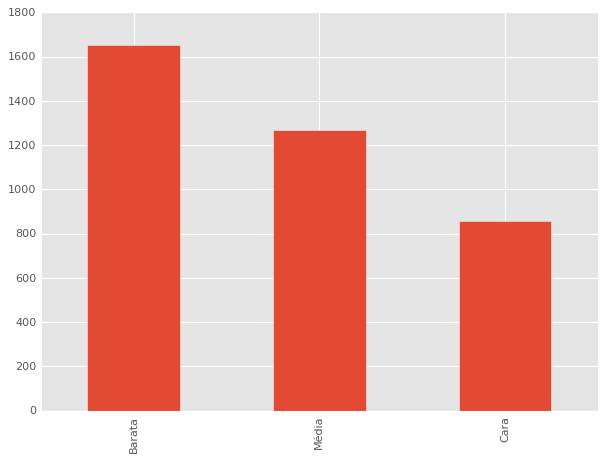

In [72]:
#Vamos aplicar essa função ao dataframe de preços

blackberry['Close'].apply(rankear)

#Precisamos contar cada categoria para plotagem, por isso inseri o .value_counts()
#Além disso, precisamos mudar o tipo de gráfico para barras


blackberry['Close'].apply(rankear).value_counts().plot(kind = 'bar')

Vamos criar um gráfico de pizza

Como está a distribuição de dias acima ou abaixo da média de preços?

In [75]:
#Vamos começar definindo a função

def media (preco):
    if preco >= blackberry['Close'].mean():
        return 'Acima'
    else:
        return 'Abaixo'

In [77]:
#Conseguimos ver facilmente a proporção de dias acima e abaixo da média

blackberry['Close'].apply(media).value_counts()

#Vamos plotar o piechart abaixo

Abaixo    2630
Acima     1151
Name: Close, dtype: int64

<AxesSubplot:ylabel='Close'>

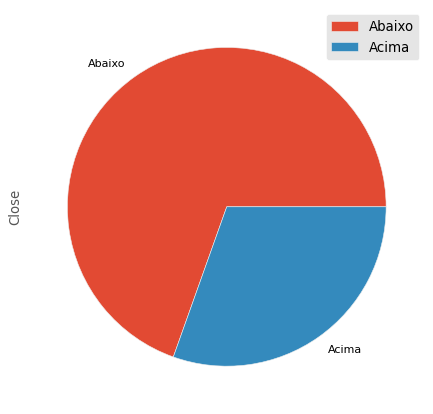

In [79]:
blackberry['Close'].apply(media).value_counts().plot(kind = 'pie', legend = True)

#Um insight importante que podemos tirar desta ação é que há dias tão acima da média que distorcem a análise
#Em outras palavras, o interesse do mercado nas ações da Blackberry foi muito mais alto em alguns momentos do que em outros